## Compare topo.nc provided by ARS in 2020 to newly generated topo.nc using defaults

In [1]:
import xarray as xr
import numpy as np

### Read in original topo.nc

In [2]:
topo_originalfn = '/uufs/chpc.utah.edu/common/home/skiles-group1/jmeyer/project-data/iSnobal/ERW/topo/basin_setup/topo.nc'
ds = xr.open_dataset(topo_originalfn)

/uufs/chpc.utah.edu/common/home/u6058223/software/pkg/miniconda3/envs/work/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


### Read in new topo.nc generated on CHPC using:
- basin_setup_quick.yaml basin env
- updated requirements.txt (remove pyshp, separately install utm without version specification, remove all version specs)

In [3]:
topo_newfn = '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_setup/output_mode/topo.nc'

ds_new = xr.open_dataset(topo_newfn)

In [4]:
ds_new

<xarray.Dataset> Size: 10MB
Dimensions:     (x: 656, y: 837)
Coordinates:
  * x           (x) float32 3kB 3.159e+05 3.16e+05 ... 3.486e+05 3.487e+05
  * y           (y) float32 3kB 4.323e+06 4.323e+06 ... 4.281e+06 4.281e+06
Data variables:
    dem         (y, x) float32 2MB ...
    mask        (y, x) uint8 549kB ...
    veg_height  (y, x) float32 2MB ...
    veg_k       (y, x) float32 2MB ...
    veg_tau     (y, x) float32 2MB ...
    veg_type    (y, x) uint16 1MB ...
    projection  int64 8B ...
Attributes:
    Conventions:  CF-1.6
    dateCreated:  2024-04-03 12:37:49
    Title:        Topographic Images for SMRF/AWSM
    history:      [2024-04-03 12:37:49] Create netCDF4 file using Basin Setup...
    institution:  USDA Agricultural Research Service, Northwest Watershed Res...

In [5]:
ds.data_vars

Data variables:
    dem                    (y, x) float32 2MB ...
    mask                   (y, x) uint8 549kB ...
    veg_type               (y, x) uint16 1MB ...
    veg_height             (y, x) float32 2MB ...
    veg_k                  (y, x) float32 2MB ...
    veg_tau                (y, x) float32 2MB ...
    Alec2 mask             (y, x) uint8 549kB ...
    projection             |S1 1B ...
    sky_view_factor        (y, x) float64 4MB ...
    terrain_config_factor  (y, x) float64 4MB ...
    slope                  (y, x) float64 4MB ...

In [6]:
import sys

In [7]:
sys.path.append('/uufs/chpc.utah.edu/common/home/u6058223/git_dirs/env/')

In [8]:
import helpers as h

## Plot DEMs and dif

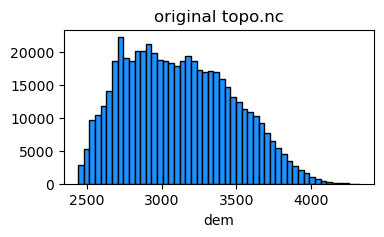

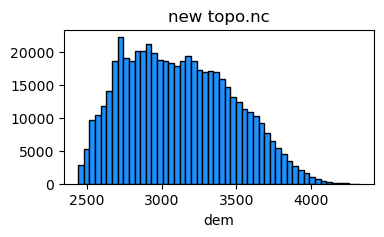

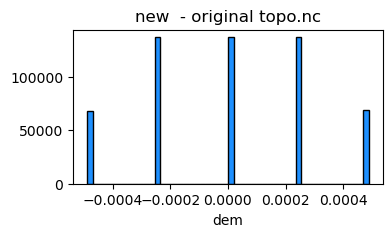

In [9]:
figsize = (4, 2)
ds_var = 'dem'
xlabel = ds_var
h.plot_hist(ds[ds_var], title='original topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var], title='new topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var] - ds[ds_var], title='new  - original topo.nc', xlabel=xlabel, figsize=figsize)

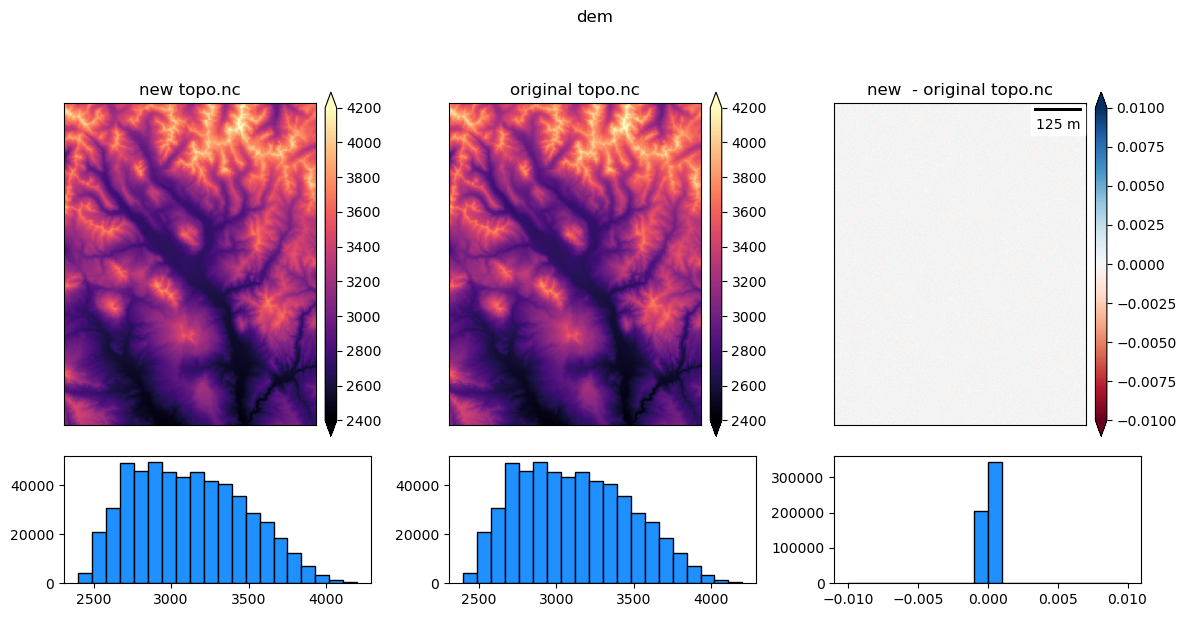

In [10]:
ds_var = 'dem'
h.comparison_plot(ds_new[ds_var], ds[ds_var], 
                  titles=['new topo.nc', 'original topo.nc', 'new  - original topo.nc'], 
                  bigtitle=ds_var, vmin=2400, vmax=4200, diffvmin=-0.01, diffvmax=0.01, cmap='magma',
                  histrange=(-0.01, 0.01), histbins=20,
                  figsize=(12, 6))

#### For all intents and purposes, DEMs are identical (which is great because they're using the same exact input so they should be

## Plot veg heights and diff

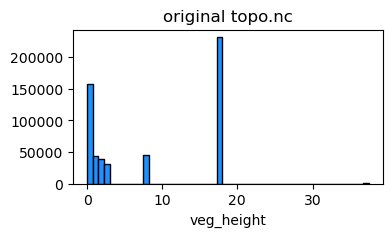

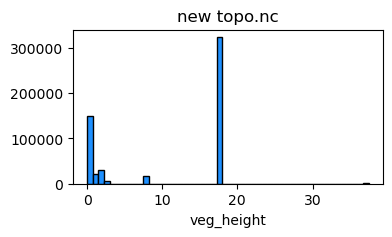

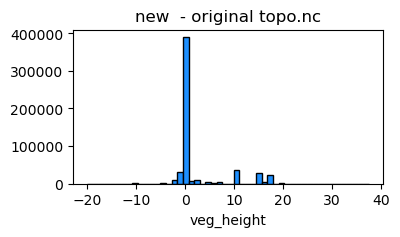

In [11]:
figsize = (4, 2)
ds_var = 'veg_height'
xlabel = ds_var
h.plot_hist(ds[ds_var], title='original topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var], title='new topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var] - ds[ds_var], title='new  - original topo.nc', xlabel=xlabel, figsize=figsize)

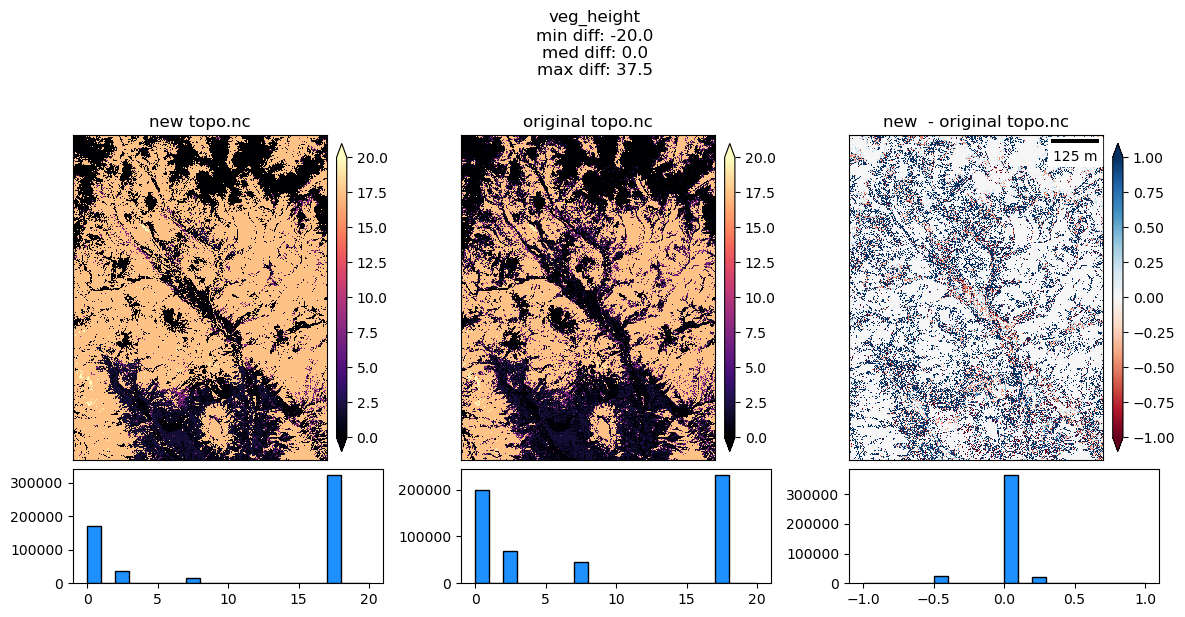

In [12]:
title = f'{ds_var}\nmin diff: {np.nanmin(ds_new[ds_var] - ds[ds_var])}\nmed diff: {np.median(ds_new[ds_var] - ds[ds_var])}\nmax diff: {np.nanmax(ds_new[ds_var] - ds[ds_var])}'
h.comparison_plot(ds_new[ds_var], ds[ds_var], 
                  titles=['new topo.nc', 'original topo.nc', 'new  - original topo.nc'], 
                  bigtitle=title, vmin=0, vmax=20, diffvmin=-1, diffvmax=1, cmap='magma',
                  histrange=(-1, 1), histbins=20,
                  figsize=(12, 6))

In [13]:
veg_height = ds_new[ds_var] - ds[ds_var]

In [14]:
np.unique(ds.veg_height)

array([ 0.        ,  0.04980469,  0.25      ,  0.5       ,  0.75      ,
        1.        ,  2.        ,  2.5       ,  7.5       , 17.5       ,
       37.5       ], dtype=float32)

In [15]:
np.unique(ds_new.veg_height)

array([ 0.  ,  0.25,  0.75,  2.  ,  2.5 ,  3.  ,  7.5 , 17.5 , 37.5 ],
      dtype=float32)

##### *Note: basin_setup issue - warning about casting into proper dtype, need to specify float (was attempting to push into int array)

#### There is some degree of variability in veg_height on hte order of 0.5 to 1.0 meters. The new topo.nc produces slightly lower veg_height 

## Plot veg_type and diff

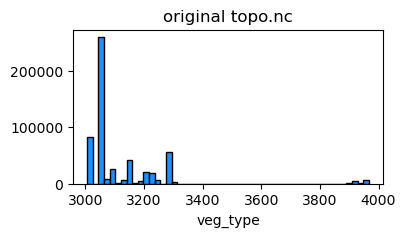

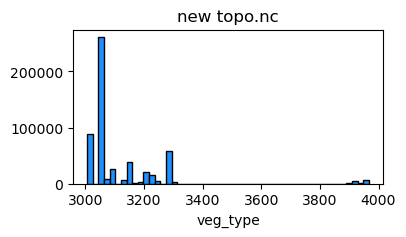

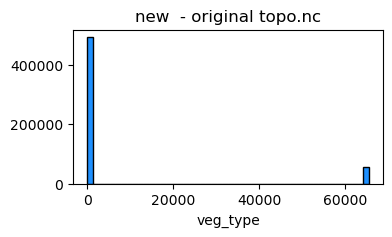

In [16]:
figsize = (4, 2)
ds_var = 'veg_type'
xlabel = ds_var
h.plot_hist(ds[ds_var], title='original topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var], title='new topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var] - ds[ds_var], title='new  - original topo.nc', xlabel=xlabel, figsize=figsize)

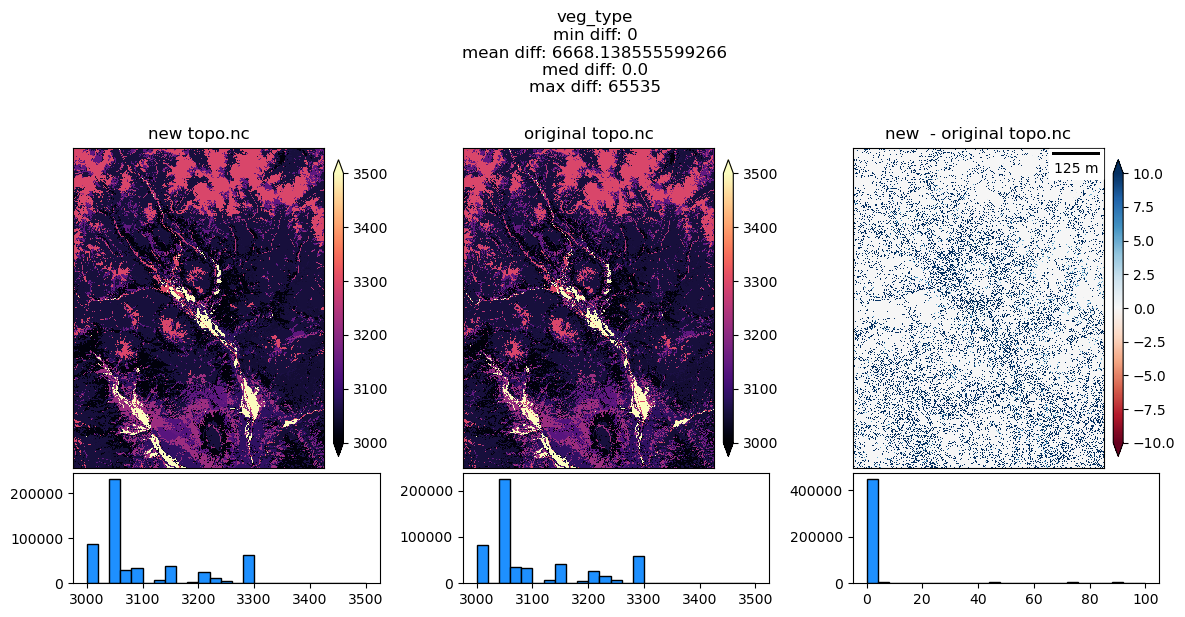

In [17]:
title = f'{ds_var}\nmin diff: {np.nanmin(ds_new[ds_var] - ds[ds_var])}\nmean diff: {np.nanmean(ds_new[ds_var] - ds[ds_var])}\nmed diff: {np.median(ds_new[ds_var] - ds[ds_var])}\nmax diff: {np.nanmax(ds_new[ds_var] - ds[ds_var])}'
h.comparison_plot(ds_new[ds_var], ds[ds_var], 
                  titles=['new topo.nc', 'original topo.nc', 'new  - original topo.nc'], 
                  bigtitle=title, vmin=3000, vmax=3500, diffvmin=-10, diffvmax=10, cmap='magma',
                  histrange=(0, 100), histbins=25,
                  figsize=(12, 6))

In [18]:
veg_type = ds_new[ds_var] - ds[ds_var]

## Plot veg_k and diff

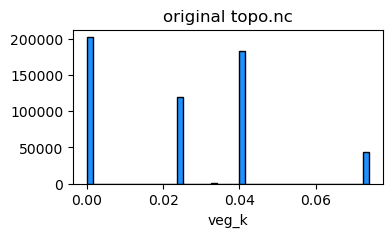

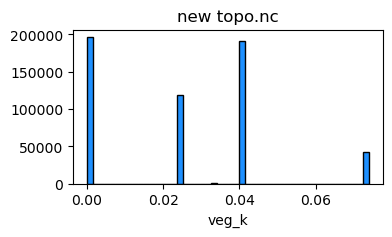

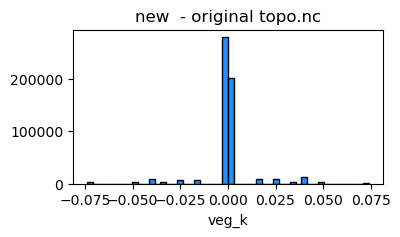

In [19]:
figsize = (4, 2)
ds_var = 'veg_k'
xlabel = ds_var
h.plot_hist(ds[ds_var], title='original topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var], title='new topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var] - ds[ds_var], title='new  - original topo.nc', xlabel=xlabel, figsize=figsize)

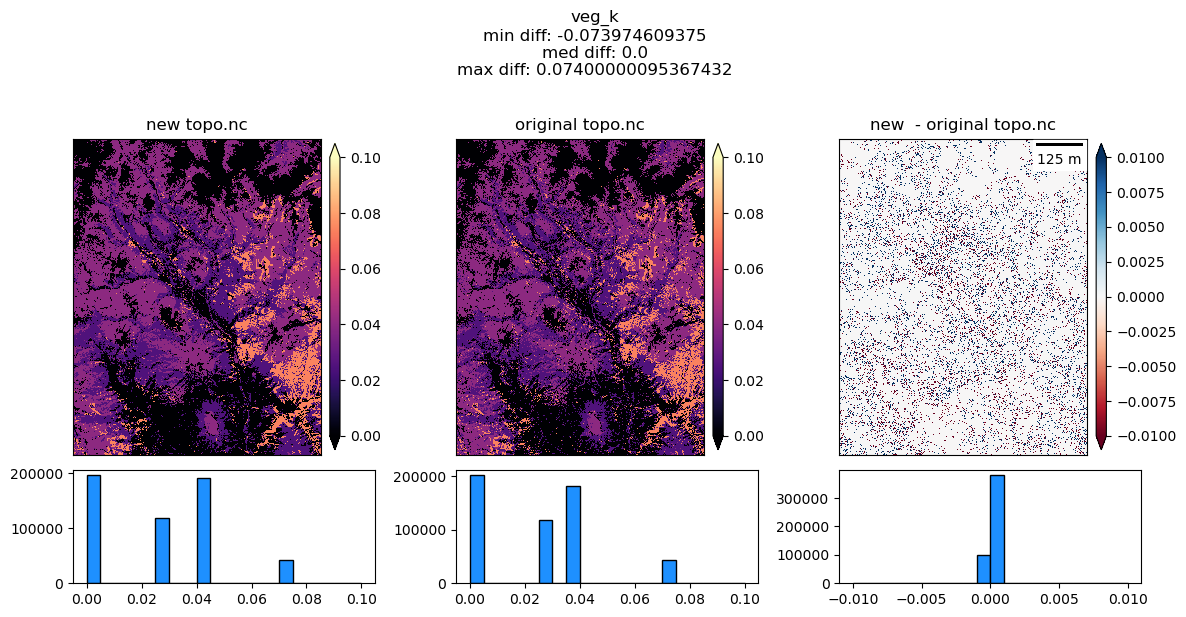

In [20]:
title = f'{ds_var}\nmin diff: {np.nanmin(ds_new[ds_var] - ds[ds_var])}\nmed diff: {np.median(ds_new[ds_var] - ds[ds_var])}\nmax diff: {np.nanmax(ds_new[ds_var] - ds[ds_var])}'
h.comparison_plot(ds_new[ds_var], ds[ds_var], 
                  titles=['new topo.nc', 'original topo.nc', 'new  - original topo.nc'], 
                  bigtitle=title, vmin=0, vmax=0.1, diffvmin=-0.01, diffvmax=0.01, cmap='magma',
                  histrange=(-0.01, 0.01), histbins=20,
                  figsize=(12, 6))

##### k acts as a reduction factor of incoming radiation

In [21]:
veg_k = ds_new[ds_var] - ds[ds_var]

## Plot veg_tau and diff

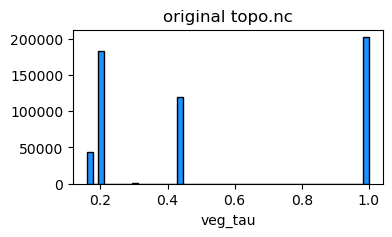

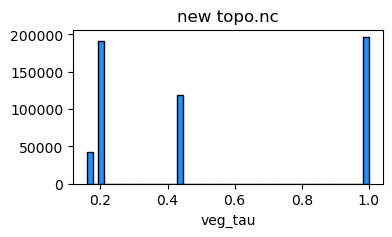

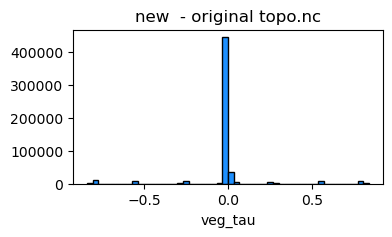

In [22]:
figsize = (4, 2)
ds_var = 'veg_tau'
xlabel = ds_var
h.plot_hist(ds[ds_var], title='original topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var], title='new topo.nc', xlabel=xlabel, figsize=figsize)
h.plot_hist(ds_new[ds_var] - ds[ds_var], title='new  - original topo.nc', xlabel=xlabel, figsize=figsize)

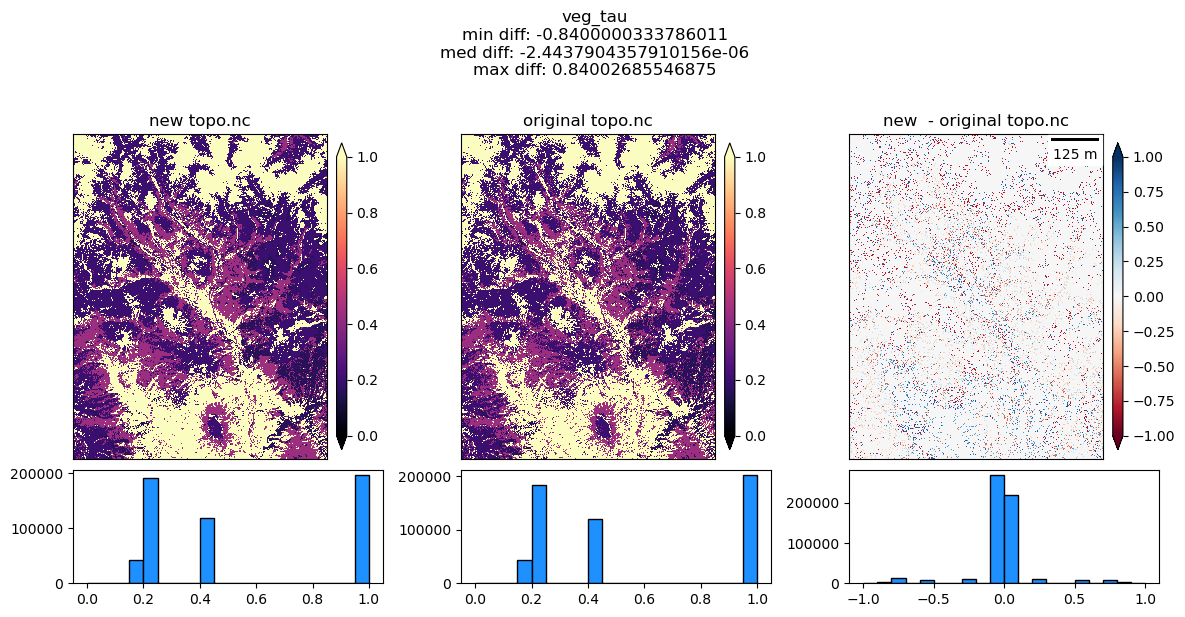

In [23]:
title = f'{ds_var}\nmin diff: {np.nanmin(ds_new[ds_var] - ds[ds_var])}\nmed diff: {np.median(ds_new[ds_var] - ds[ds_var])}\nmax diff: {np.nanmax(ds_new[ds_var] - ds[ds_var])}'
h.comparison_plot(ds_new[ds_var], ds[ds_var], 
                  titles=['new topo.nc', 'original topo.nc', 'new  - original topo.nc'], 
                  bigtitle=title, vmin=0, vmax=1, diffvmin=-1, diffvmax=1, cmap='magma',
                  histrange=(-1, 1), histbins=20,
                  figsize=(12, 6))

In [24]:
veg_tau = ds_new[ds_var] - ds[ds_var]

##### Potentially a result of differences in gdal resampling --> we think this is where things are coming from.

## Confirm that differences in veg_height and veg_type categorization are responsible for veg_tau and veg_k differences

In [25]:
import matplotlib.pyplot as plt

#### Plot differences from ARS topo.nc products for all veg_*  arrays

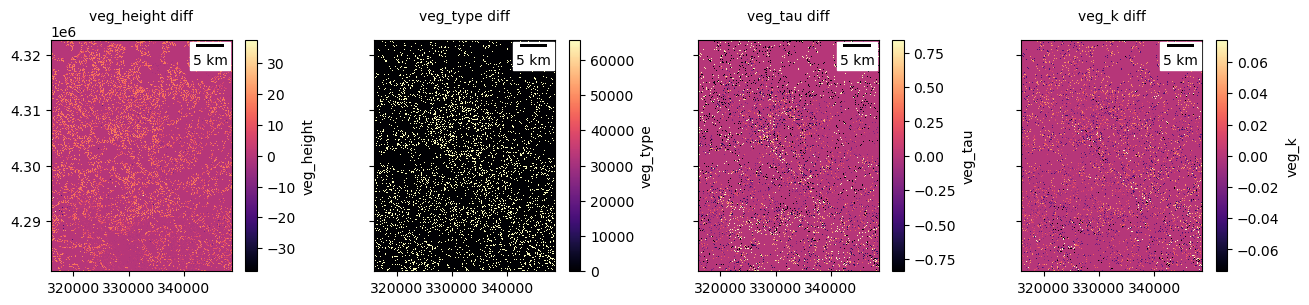

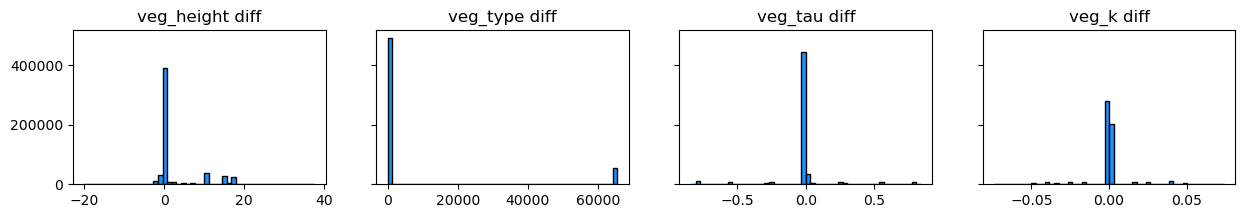

In [26]:
diffs = [veg_height, veg_type, veg_tau, veg_k]
titles = ['veg_height', 'veg_type', 'veg_tau', 'veg_k']

fig, ax = plt.subplots(1, len(titles), figsize=(16, 3), sharey=True)
fig2, ax2 = plt.subplots(1, len(titles), figsize=(15, 2), sharey=True)

for idx in range(len(diffs)):
    h.plot_one(arr=diffs[idx], title=f'{titles[idx]} diff', specify_ax=(fig, ax[idx]), turnofflabels=True, cmap='magma', setfc='k')
    h.plot_hist(diffs[idx], title=f'{titles[idx]} diff', specify_ax=(fig2, ax2[idx]), xlabel='')

#### See if non-zero areas in veg_height or veg_type coincide with non-zero pixels in veg_tau and veg_k

In [27]:
import copy

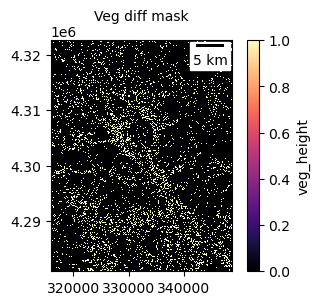

In [28]:
# Extract non-zero mask by combining non-zero pixels from veg_height and veg_type
# if pixel value is != 0 in either array, then the mask value = 1
big_veg_ma = copy.deepcopy(veg_height)

# set the array values to 1 (masked by default)
big_veg_maval = np.ones_like(big_veg_ma.values)

# Set to 0 where the diff array pixels are equivalent to 0
big_veg_maval[veg_height.values == 0] = 0
big_veg_maval[veg_type.values == 0] = 0


# Reassign values to big_veg_ma
big_veg_ma.values = big_veg_maval

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
h.plot_one(arr=big_veg_ma, title=f'Veg diff mask', specify_ax=(fig, ax), turnofflabels=True, cmap='magma', setfc='k')

veg_tau
veg_k
percent non-zero
46199 58076 79.5%
percent non-zero
323491 490996 65.9%
percent non-zero
46199 58076 79.5%
percent non-zero
323491 490996 65.9%


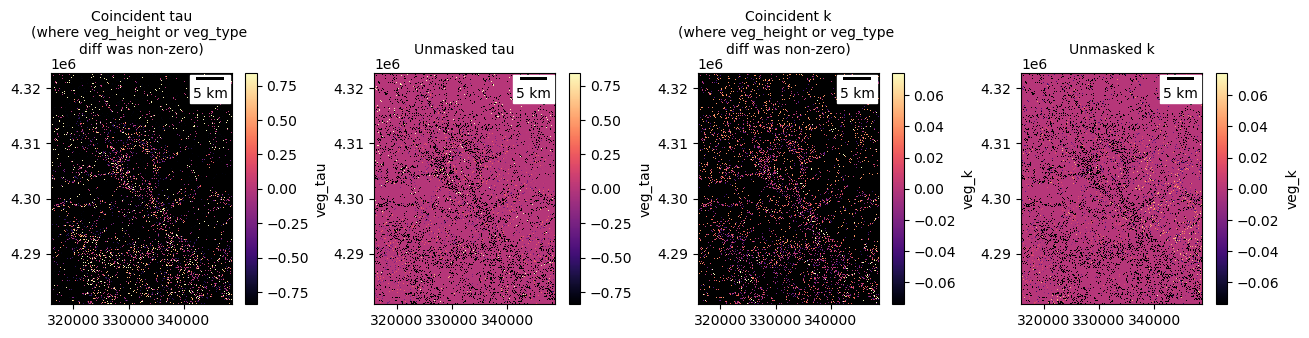

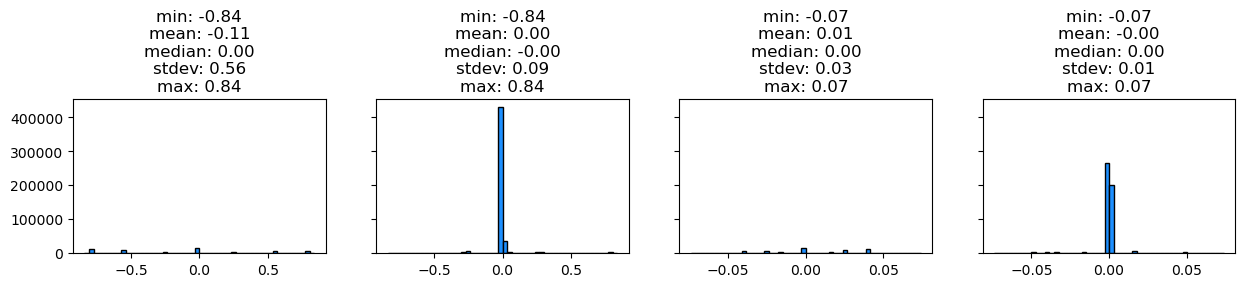

In [29]:
# Use this mask to divide pixels in veg_tau and veg_k between masked (coincident with masked pixels) and unmasked (not directly explained by veg_height and veg_type diffs)
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig2, ax2 = plt.subplots(1, len(titles), figsize=(15, 2), sharey=True)

arrs = []
for f in [veg_tau, veg_k]:
    print(f.name)
    for idx in range(2):
        arr = copy.deepcopy(f)
        arrval = arr.values
        arrval[big_veg_ma.values==idx] = np.nan
        arr.values = arrval
        arrs.append(arr)

ma_titles = ['Coincident tau\n(where veg_height or veg_type \ndiff was non-zero)', 'Unmasked tau', 'Coincident k\n(where veg_height or veg_type \ndiff was non-zero)', 'Unmasked k']
allbits = []
for idx in range(len(arrs)):
    h.plot_one(arr=arrs[idx], title=f'{ma_titles[idx]}', specify_ax=(fig, ax[idx]), turnofflabels=True, cmap='magma', setfc='k')
    bits = h.plot_hist(arrs[idx], 
                       title=f'min: {np.nanmin(arrs[idx]):.2f}\nmean: {np.nanmean(arrs[idx]):.2f}\nmedian: {np.nanmedian(arrs[idx]):.2f}\nstdev: {np.nanstd(arrs[idx]):.2f}\nmax: {np.nanmax(arrs[idx]):.2f}', 
                       specify_ax=(fig2, ax2[idx]), xlabel='', returnbits=True) 
    
    arrnonan = arrs[idx].values[~np.isnan(arrs[idx].values)]
    print('percent non-zero')
    print((arrnonan!=0).sum(), arrnonan.size, f'{(arrnonan!=0).sum() / arrnonan.size * 100:.1f}%')
    allbits.append(bits)

## >> Want to see high peak around zero for unmasked bits, and we do for the most part

# Compare model outputs for new and original topo.nc

#### first day of WY 2018

- Run WY 2018, 2019 to gauge impacts
- Check out Joe's GMD paper
- Look at schofield pass snow depth plots

In [30]:
# Working directory of outputs for WY 2018
wd_2018 = '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin'
snow_fns = h.fn_list(wd_2018, '*/snow.nc')
print(len(snow_fns))

365


In [31]:
# Read in snow.nc to start
ds = xr.open_dataset(snow_fns[100])
ds

<xarray.Dataset> Size: 20MB
Dimensions:           (time: 1, y: 837, x: 656)
Coordinates:
  * time              (time) datetime64[ns] 8B 2018-01-09T22:00:00
  * y                 (y) float32 3kB 4.323e+06 4.323e+06 ... 4.281e+06
  * x                 (x) float32 3kB 3.159e+05 3.16e+05 ... 3.486e+05 3.487e+05
Data variables:
    thickness         (time, y, x) float32 2MB ...
    snow_density      (time, y, x) float32 2MB ...
    specific_mass     (time, y, x) float32 2MB ...
    liquid_water      (time, y, x) float32 2MB ...
    temp_surf         (time, y, x) float32 2MB ...
    temp_lower        (time, y, x) float32 2MB ...
    temp_snowcover    (time, y, x) float32 2MB ...
    thickness_lower   (time, y, x) float32 2MB ...
    water_saturation  (time, y, x) float32 2MB ...
    projection        |S1 1B ...

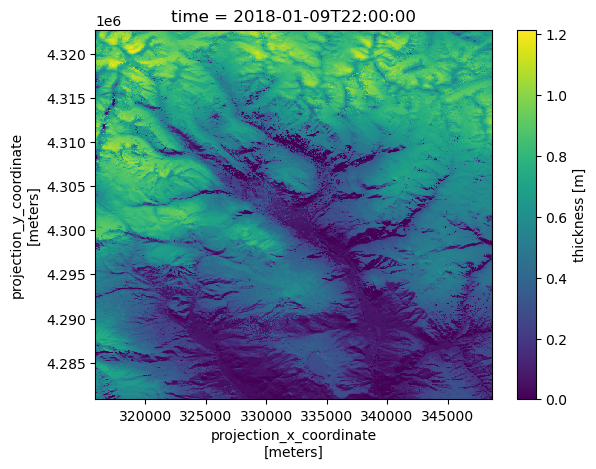

In [32]:
ds['thickness'].plot()

In [33]:
import pathlib as p

In [34]:
def get_varnc(basin=None, indir=None, indate=None, templatefn=None, returnvar=None):
    '''Returns specified output files based on template file or basin and date.
    If no specified variable, returns all files
    basin = erw_newbasin_isnobal/
    indir = erw_newbasin_isnobal/wy2018/erw_newbasin/
    indate = 20180109
    TODO
    maybe remove basin
    add returnvar handling for an input list

    '''
    import pathlib as p
        
    # first check if you are looking for specific date based on template fn    
    if templatefn is not None:
        datedir = p.PurePath(templatefn).parent.as_posix()

    # or an input directory and specific date    
    elif (indir is not None) & (indate is not None):
        datedir = h.fn_list(indir, f'*{indate}/')[0]

    if returnvar is None:
        return h.fn_list(datedir, '*nc')
    else:
        return h.fn_list(datedir, f'*{returnvar}*.nc')

In [35]:
get_varnc(templatefn=snow_fns[100])

['/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/air_temp.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/albedo_ir.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/albedo_vis.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/cloud_factor.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/em.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/net_solar.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/percent_snow.nc',
 '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2018/erw_newbasin/run20180109/precip.n

In [36]:
# Look at thermal, albedo_vis, albedo_ir, wind_speed

In [37]:
thermal_ds = xr.open_dataset(get_varnc(indir=wd_2018, indate='20180109', returnvar='thermal')[0])
thermal_ds

<xarray.Dataset> Size: 53MB
Dimensions:     (time: 24, y: 837, x: 656)
Coordinates:
  * time        (time) datetime64[ns] 192B 2018-01-09 ... 2018-01-09T23:00:00
  * y           (y) float32 3kB 4.323e+06 4.323e+06 ... 4.281e+06 4.281e+06
  * x           (x) float32 3kB 3.159e+05 3.16e+05 ... 3.486e+05 3.487e+05
Data variables:
    thermal     (time, y, x) float32 53MB ...
    projection  |S1 1B ...
Attributes:
    Conventions:   CF-1.6
    dateCreated:   2024-04-01 22:32:10
    title:         Distributed Thermal (longwave) radiation data from SMRF
    history:       [2024-04-01 22:32:10] Create netCDF4 file
    institution:   USDA Agricultural Research Service, Northwest Watershed Re...
    references:    Online documentation smrf.readthedocs.io; https://doi.org/...
    SMRF_version:  unknown

In [38]:
albedovis_ds = xr.open_dataset(get_varnc(indir=wd_2018, indate='20180109', returnvar='albedo_vis')[0])
albedovis_ds

<xarray.Dataset> Size: 53MB
Dimensions:     (time: 24, y: 837, x: 656)
Coordinates:
  * time        (time) datetime64[ns] 192B 2018-01-09 ... 2018-01-09T23:00:00
  * y           (y) float32 3kB 4.323e+06 4.323e+06 ... 4.281e+06 4.281e+06
  * x           (x) float32 3kB 3.159e+05 3.16e+05 ... 3.486e+05 3.487e+05
Data variables:
    albedo_vis  (time, y, x) float32 53MB ...
    projection  |S1 1B ...
Attributes:
    Conventions:   CF-1.6
    dateCreated:   2024-04-01 22:32:10
    title:         Distributed Visible wavelength albedo data from SMRF
    history:       [2024-04-01 22:32:10] Create netCDF4 file
    institution:   USDA Agricultural Research Service, Northwest Watershed Re...
    references:    Online documentation smrf.readthedocs.io; https://doi.org/...
    SMRF_version:  unknown

In [39]:
albedoir_ds = xr.open_dataset(get_varnc(indir=wd_2018, indate='20180109', returnvar='albedo_ir')[0])
albedoir_ds

<xarray.Dataset> Size: 53MB
Dimensions:     (time: 24, y: 837, x: 656)
Coordinates:
  * time        (time) datetime64[ns] 192B 2018-01-09 ... 2018-01-09T23:00:00
  * y           (y) float32 3kB 4.323e+06 4.323e+06 ... 4.281e+06 4.281e+06
  * x           (x) float32 3kB 3.159e+05 3.16e+05 ... 3.486e+05 3.487e+05
Data variables:
    albedo_ir   (time, y, x) float32 53MB ...
    projection  |S1 1B ...
Attributes:
    Conventions:   CF-1.6
    dateCreated:   2024-04-01 22:32:10
    title:         Distributed Infrared wavelength albedo data from SMRF
    history:       [2024-04-01 22:32:10] Create netCDF4 file
    institution:   USDA Agricultural Research Service, Northwest Watershed Re...
    references:    Online documentation smrf.readthedocs.io; https://doi.org/...
    SMRF_version:  unknown

In [40]:
wind_ds = xr.open_dataset(get_varnc(indir=wd_2018, indate='20180109', returnvar='wind')[0])
wind_ds

<xarray.Dataset> Size: 53MB
Dimensions:     (time: 24, y: 837, x: 656)
Coordinates:
  * time        (time) datetime64[ns] 192B 2018-01-09 ... 2018-01-09T23:00:00
  * y           (y) float32 3kB 4.323e+06 4.323e+06 ... 4.281e+06 4.281e+06
  * x           (x) float32 3kB 3.159e+05 3.16e+05 ... 3.486e+05 3.487e+05
Data variables:
    wind_speed  (time, y, x) float32 53MB ...
    projection  |S1 1B ...
Attributes:
    Conventions:   CF-1.6
    dateCreated:   2024-04-01 22:32:10
    title:         Distributed Wind speed data from SMRF
    history:       [2024-04-01 22:32:10] Create netCDF4 file
    institution:   USDA Agricultural Research Service, Northwest Watershed Re...
    references:    Online documentation smrf.readthedocs.io; https://doi.org/...
    SMRF_version:  unknown

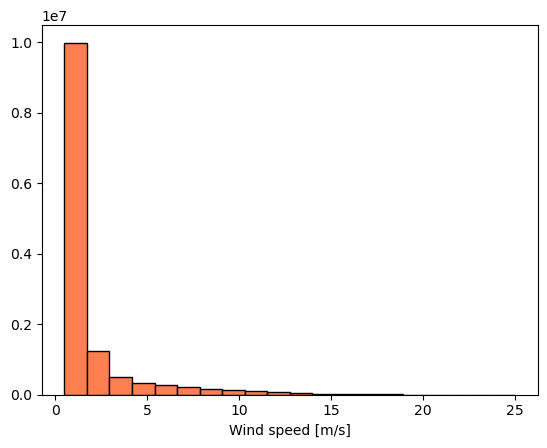

In [41]:
bins = 20
ec = 'k'
fc = 'coral'
wind_ds['wind_speed'].plot(bins=bins, ec=ec, facecolor=fc);

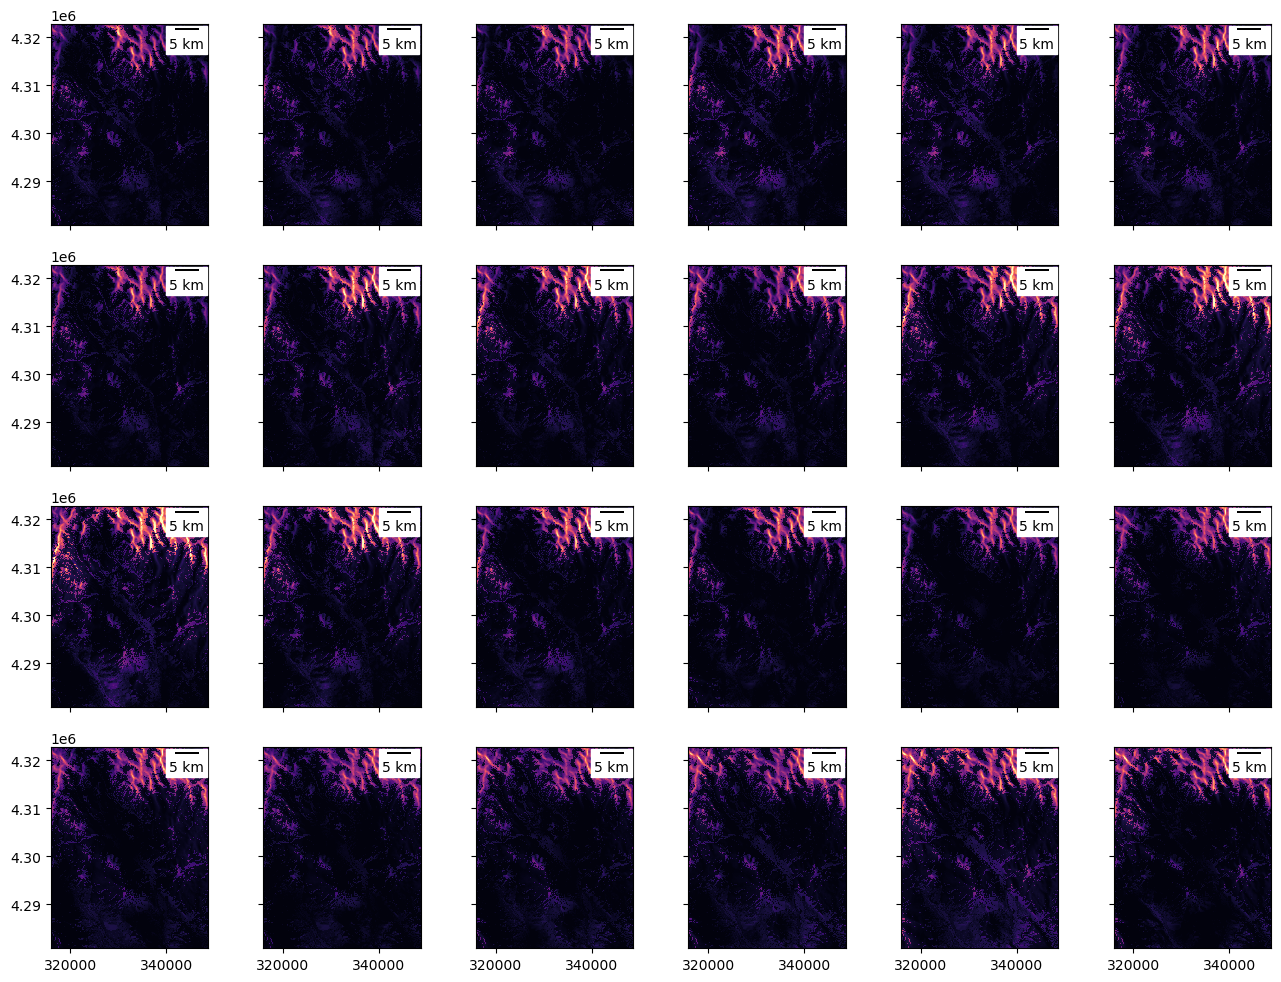

In [42]:
fig, ax = plt.subplots(4, 6, figsize=(16,12), sharex=True, sharey=True)

for jdx, hour in enumerate(wind_ds['wind_speed'].time):
    # print(jdx, hour.values)
    thisax = ax.flatten()[jdx]
    # wind_ds['wind_speed'].loc[hour.values].plot.imshow(ax=thisax)
    # h.plot_one(arr=wind_ds['wind_speed'].loc[hour.values], 
    #            specify_ax=(fig, thisax), 
    #            turnofflabels=True, 
    #            title=None, 
    #            vmin=0, 
    #            vmax=20, 
    #            cbaron=False)
    # this is ever so slightly faster, and much more readable
    
    h.plot_one(arr=wind_ds['wind_speed'].sel(time=hour.values), 
               specify_ax=(fig, thisax), 
               turnofflabels=True, 
               title=None, 
               vmin=0, 
               vmax=20, 
               cbaron=False)

### Great, now pull all the snow depth (snow.nc 'thickness' variables) from each day in this water year based on Schofield pass location

In [43]:
# Schofield pass location (lat lon) convert to UTM
# SNOTEL Site: Schofield Pass
# State: Colorado
# Site Number: 737
# County: Gunnison
# Latitude: 39 deg; 1 min N
# Longitude: 107 deg; 3 min W
# Elevation: 10653 feet
# Reporting since: 1984-10-01

snotellats = [39 + 1/60]
snotellons = [-107 - 3/60]

# Butte
# SNOTEL Site: Butte
# State: Colorado
# Site Number: 380
# County: Gunnison
# Latitude: 38 deg; 54 min N
# Longitude: 106 deg; 57 min W
# Elevation: 10200 feet
# Reporting since: 1979-10-01
snotellats.append(38+54/60)
snotellons.append(-106-57/60)

# Upper Taylor
# SNOTEL Site: Upper Taylor
# State: Colorado
# Site Number: 1141
# County: Gunnison
# Latitude: 38 deg; 59 min N
# Longitude: 106 deg; 45 min W
# Elevation: 10717 feet
# Reporting since: 2009-08-26
snotellats.append(38+59/60)
snotellons.append(-106-45/60)
snotellats, snotellons

([39.016666666666666, 38.9, 38.983333333333334], [-107.05, -106.95, -106.75])

In [44]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import pyproj
# pyproj.datadir.get_data_dir()
pyproj.datadir.set_data_dir('/uufs/chpc.utah.edu/common/home/u6058223/software/pkg/miniconda3/pkgs/proj-9.3.1-h1d62c97_0/share/proj')
# pyproj.datadir.get_data_dir()

# Create a Geoseries based off of a list of a Shapely point using the lat and lon from the SNOTEL site
s = gpd.GeoSeries([Point(lon, lat) for lon, lat in zip(snotellons, snotellats)])

# Turn this into a geodataframe and specify the geom as the geoseries of the SNOTEL point
gdf = gpd.GeoDataFrame(geometry=s)

# Set the CRS inplace
gdf.set_crs('epsg:4326', inplace=True)

# Convert snotel coords' lat lon to UTM
gdf = gdf.to_crs('epsg:32613')
gdf

geometry
0  POINT (322520.620 4320625.413)
1  POINT (330901.684 4307486.948)
2  POINT (348423.919 4316383.556)

In [45]:
# Extract data value from this point based on nearest neighbor lookup (inexact)
# Coords must be bracketed
ds['thickness'].sel(x=list(gdf.geometry.x.values), y=list(gdf.geometry.y.values), method='nearest').values

array([[[0.89479655, 0.95198137, 0.66608036],
        [0.841492  , 0.48786524, 0.6549709 ],
        [0.73290426, 0.73108655, 0.8350364 ]]], dtype=float32)

In [46]:
%%time
# Ok, now that we have the proper geometry for the SNOTEL site in UTM 13N coords
# run through all the snow.nc files in the working directory 
# and extract the snow depth from each of these files
depths = []
for sd_fn in snow_fns:
    ds = xr.open_dataset(sd_fn)
    snowdepth = ds['thickness'].sel(x=list(gdf.geometry.x.values), y=list(gdf.geometry.y.values), method='nearest')
    depths.append(snowdepth)
    del ds, snowdepth

CPU times: user 9.75 s, sys: 1.81 s, total: 11.6 s
Wall time: 46.1 s


### Concatenate the list of data arrays into a single dataarray based on time dimension

In [47]:
%%time
depth_ts = xr.concat(depths, dim='time')
print(depth_ts.x.values)
print(depth_ts.y.values)

[322525. 330925. 348425.]
[4320625. 4307475. 4316375.]
CPU times: user 5.94 s, sys: 2.65 s, total: 8.59 s
Wall time: 21 s


### Extract into individual time series (just for clarity, not critical)

In [48]:
# Schofield Pass time series
schofield = depth_ts[:, 0, 0]

# Butte time series
butte = depth_ts[:, 1, 1]

# Upper Taylor time series
uppertaylor = depth_ts[:, 2, 2]

### Now plot the snow depths

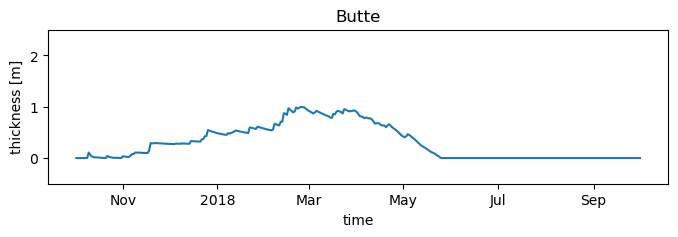

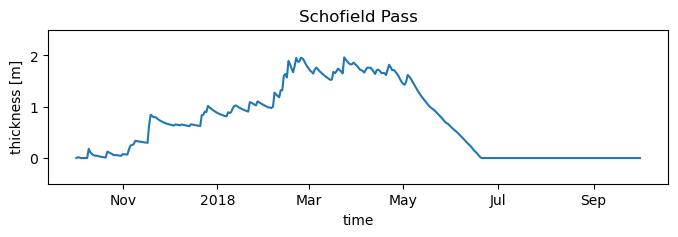

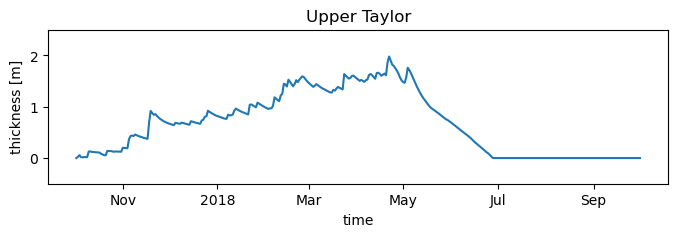

In [49]:
figsize = (8,2)
ylims = (-0.5, 2.5)
butte.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Butte');

schofield.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Schofield Pass');

uppertaylor.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Upper Taylor');

In [50]:
# store this as 2018 to compare with GMD outputs
wy_2018_jmh = [schofield, butte, uppertaylor]

## Do it again for WY 2019

In [51]:
# Working directory of outputs for WY 2018
wd_2019 = '/uufs/chpc.utah.edu/common/home/skiles-group1/jmhu/test/erw_newbasin_isnobal/wy2019/erw_newbasin'
snow_fns = h.fn_list(wd_2019, '*/snow.nc')
print(len(snow_fns))

365


In [52]:
%%time
# Ok, now that we have the proper geometry for the SNOTEL site in UTM 13N coords
# run through all the snow.nc files in the working directory 
# and extract the snow depth from each of these files
depths = []
for sd_fn in snow_fns:
    ds = xr.open_dataset(sd_fn)
    snowdepth = ds['thickness'].sel(x=list(gdf.geometry.x.values), y=list(gdf.geometry.y.values), method='nearest')
    depths.append(snowdepth)
    del ds, snowdepth

CPU times: user 9.6 s, sys: 1.71 s, total: 11.3 s
Wall time: 36 s


### Concatenate the list of data arrays into a single dataarray based on time dimension

In [53]:
%%time
depth_ts = xr.concat(depths, dim='time')
print(depth_ts.x.values)
print(depth_ts.y.values)

[322525. 330925. 348425.]
[4320625. 4307475. 4316375.]
CPU times: user 6.26 s, sys: 2.62 s, total: 8.87 s
Wall time: 20.6 s


### Extract into individual time series (just for clarity, not critical)

In [54]:
# Schofield Pass time series
schofield = depth_ts[:, 0, 0]

# Butte time series
butte = depth_ts[:, 1, 1]

# Upper Taylor time series
uppertaylor = depth_ts[:, 2, 2]

### Now plot the snow depths

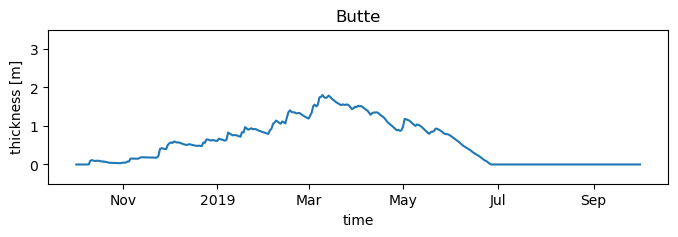

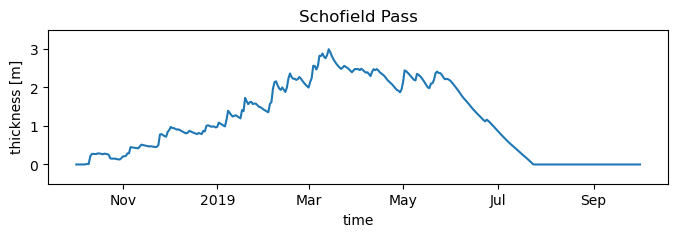

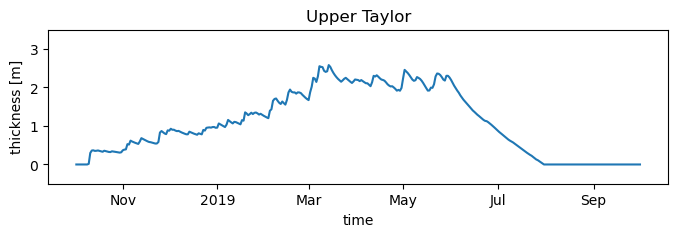

In [55]:
figsize = (8,2)
ylims = (-0.5, 3.5)
butte.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Butte');

schofield.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Schofield Pass');

uppertaylor.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Upper Taylor');

In [56]:
# store this as 2019 to compare with GMD outputs
wy_2019_jmh = [schofield, butte, uppertaylor]

# Now read in Joe's GMD bits

In [57]:
gmd18 = '/uufs/chpc.utah.edu/common/home/skiles-group1/erw_isnobal/GMD/wy2018/erw/'
snow_fns = h.fn_list(gmd18, '*/snow.nc')
print(len(snow_fns))

365


[322525. 330925. 348425.]
[4320625. 4307475. 4316375.]
CPU times: user 19.2 s, sys: 2.73 s, total: 21.9 s
Wall time: 39.3 s


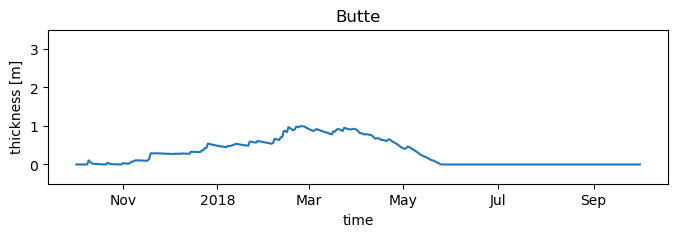

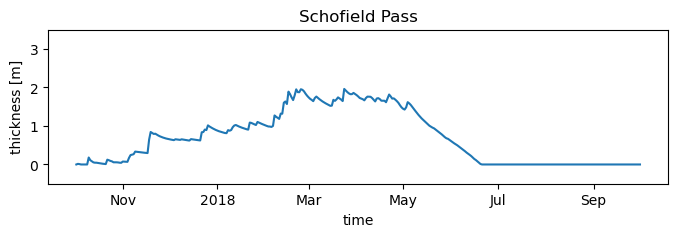

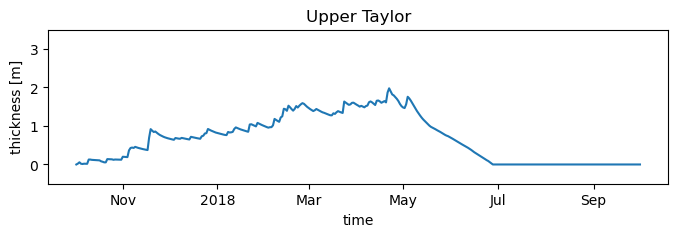

In [58]:
%%time
# Ok, now that we have the proper geometry for the SNOTEL site in UTM 13N coords
# run through all the snow.nc files in the working directory 
# and extract the snow depth from each of these files
depths = []
for sd_fn in snow_fns:
    ds = xr.open_dataset(sd_fn)
    snowdepth = ds['thickness'].sel(x=list(gdf.geometry.x.values), y=list(gdf.geometry.y.values), method='nearest')
    depths.append(snowdepth)
    del ds, snowdepth
    
# Concatenate the list of data arrays into a single dataarray based on time dimension
depth_ts = xr.concat(depths, dim='time')
print(depth_ts.x.values)
print(depth_ts.y.values)

# Extract into individual time series (just for clarity, not critical)
# Schofield Pass time series
schofield = depth_ts[:, 0, 0]

# Butte time series
butte = depth_ts[:, 1, 1]

# Upper Taylor time series
uppertaylor = depth_ts[:, 2, 2]

figsize = (8,2)
ylims = (-0.5, 3.5)
butte.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Butte');

schofield.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Schofield Pass');

uppertaylor.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Upper Taylor');

In [59]:
wy_2018_gmd = [schofield, butte, uppertaylor]

#### And do a quick diff and plot those for WY 2018

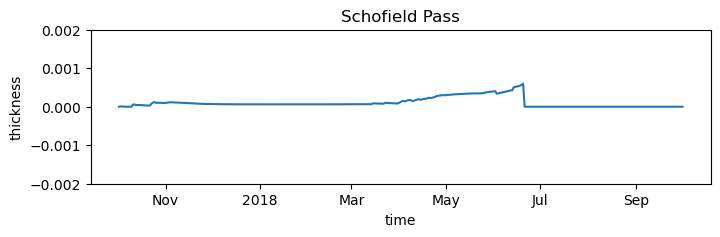

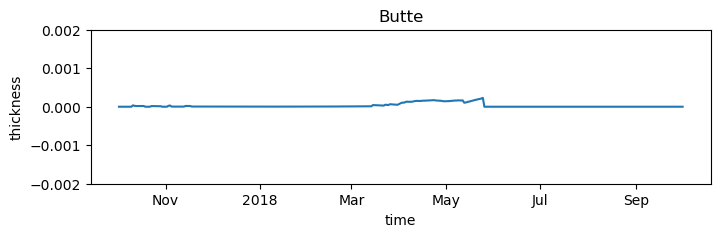

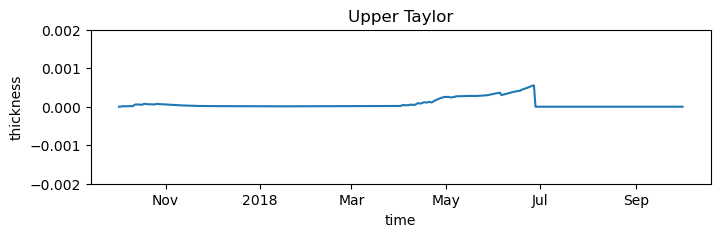

In [60]:
ylims = (-0.002, 0.002)
sites = ['Schofield Pass', 'Butte', 'Upper Taylor']
for jdx in range(len(wy_2018_gmd)):
    (wy_2018_jmh[jdx] - wy_2018_gmd[jdx]).plot(figsize=figsize)
    plt.gca().set_ylim(ylims)
    plt.title(f'{sites[jdx]}');

## And run for WY 2019

In [61]:
gmd19 = '/uufs/chpc.utah.edu/common/home/skiles-group1/erw_isnobal/GMD/wy2019/erw/'
snow_fns = h.fn_list(gmd19, '*/snow.nc')
print(len(snow_fns))

365


[322525. 330925. 348425.]
[4320625. 4307475. 4316375.]
CPU times: user 19.4 s, sys: 3.21 s, total: 22.6 s
Wall time: 44.2 s


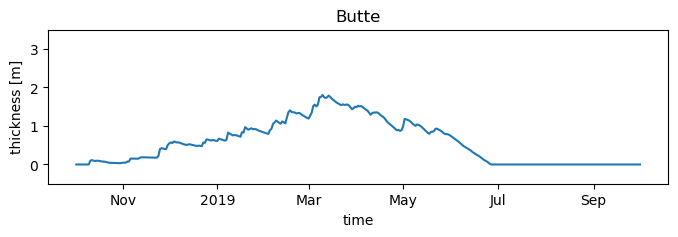

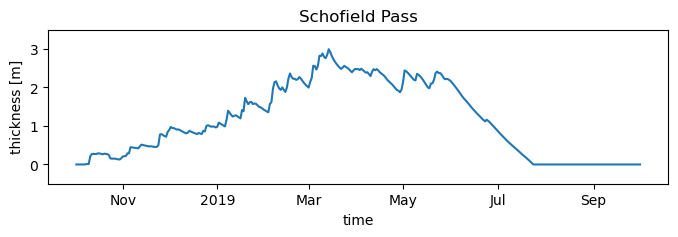

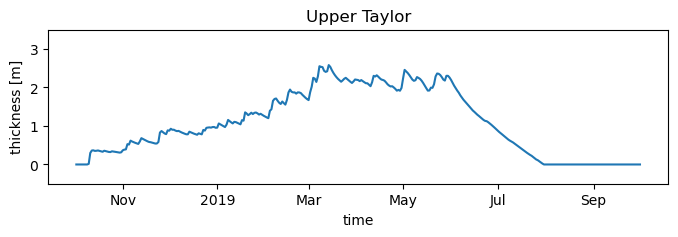

In [62]:
%%time
# Ok, now that we have the proper geometry for the SNOTEL site in UTM 13N coords
# run through all the snow.nc files in the working directory 
# and extract the snow depth from each of these files
depths = []
for sd_fn in snow_fns:
    ds = xr.open_dataset(sd_fn)
    snowdepth = ds['thickness'].sel(x=list(gdf.geometry.x.values), y=list(gdf.geometry.y.values), method='nearest')
    depths.append(snowdepth)
    del ds, snowdepth
    
# Concatenate the list of data arrays into a single dataarray based on time dimension
depth_ts = xr.concat(depths, dim='time')
print(depth_ts.x.values)
print(depth_ts.y.values)

# Extract into individual time series (just for clarity, not critical)
# Schofield Pass time series
schofield = depth_ts[:, 0, 0]

# Butte time series
butte = depth_ts[:, 1, 1]

# Upper Taylor time series
uppertaylor = depth_ts[:, 2, 2]

figsize = (8,2)
ylims = (-0.5, 3.5)
butte.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Butte');

schofield.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Schofield Pass');

uppertaylor.plot(figsize=figsize)
plt.gca().set_ylim(ylims)
plt.title('Upper Taylor');

In [63]:
wy_2019_gmd = [schofield, butte, uppertaylor]

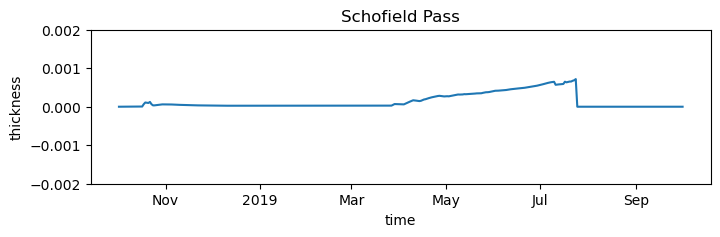

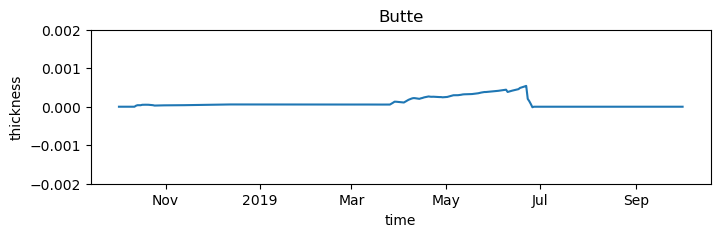

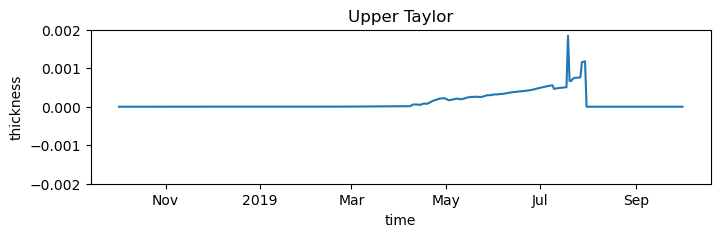

In [64]:
ylims = (-0.002, 0.002)
sites = ['Schofield Pass', 'Butte', 'Upper Taylor']
for jdx in range(len(wy_2019_gmd)):
    (wy_2019_jmh[jdx] - wy_2019_gmd[jdx]).plot(figsize=figsize)
    plt.gca().set_ylim(ylims)
    plt.title(f'{sites[jdx]}');